In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np



In [7]:

# Define dataset paths
data_dir = '/home/acer/Desktop/train(Resized_Augmented)'  # Replace with the path to your dataset

In [9]:
# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

In [11]:
# Data preprocessing with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # 80% train, 20% test
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 2020 images belonging to 5 classes.


In [15]:
val_test_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

val_generator = val_test_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 505 images belonging to 5 classes.


In [17]:
test_generator = val_test_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 505 images belonging to 5 classes.


In [19]:
# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2024-12-03 02:56:48.082801: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [21]:
# Freeze the base model
base_model.trainable = False

In [23]:
# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(train_generator.num_classes, activation='softmax')
])

In [25]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10


/home/acer/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5727 - loss: 1.1420 - val_accuracy: 0.9307 - val_loss: 0.3794
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 896ms/step - accuracy: 0.8878 - loss: 0.3799 - val_accuracy: 0.9426 - val_loss: 0.2571
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 895ms/step - accuracy: 0.9320 - loss: 0.2277 - val_accuracy: 0.9406 - val_loss: 0.2426
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 889ms/step - accuracy: 0.9478 - loss: 0.1873 - val_accuracy: 0.9505 - val_loss: 0.2061
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 866ms/step - accuracy: 0.9619 - loss: 0.1622 - val_accuracy: 0.9545 - val_loss: 0.1681
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 865ms/step - accuracy: 0.9688 - loss: 0.1355 - val_accuracy: 0.9505 - val_loss: 0.1702
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 886ms/step - accuracy: 0.9690 - loss: 0.1273 - val_accuracy: 0.9525 - val_loss: 0.1524
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 885ms/step - accuracy: 0.9752 - loss: 0.0995 - val_accuracy: 0.9485 -

In [29]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.8810 - loss: 0.3344 - val_accuracy: 0.8950 - val_loss: 0.3527
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9873 - loss: 0.0549 - val_accuracy: 0.9366 - val_loss: 0.1932
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.9828 - loss: 0.0508 - val_accuracy: 0.9644 - val_loss: 0.0975
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9644 - val_loss: 0.1027
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.9703 - val_loss: 0.0939
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9993 - loss: 0.0078 - val_accuracy: 0.9663 - val_loss: 0.0907
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9956 - loss: 0.0188 - val_accuracy: 0.9604 - val_loss: 0.1049
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9915 - loss: 0.0235 - val_accuracy: 0.9545 - v

In [31]:
# Evaluate the model on the test set
test_generator.reset()
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 430ms/step - accuracy: 0.9553 - loss: 0.1383
Test Loss: 0.09912163019180298, Test Accuracy: 0.9643564224243164


In [33]:
# Generate classification metrics
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step


In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 93   2   0   6   0]
 [  0  97   0   4   0]
 [  0   1 100   0   0]
 [  0   0   0 101   0]
 [  2   3   0   0  96]]


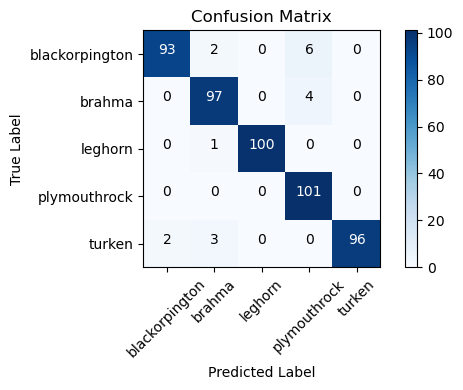

In [67]:
# Plot Confusion Matrix with Class Names
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [39]:
# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:")
print(report)

Classification Report:
                precision    recall  f1-score   support

blackorpington       0.98      0.92      0.95       101
        brahma       0.94      0.96      0.95       101
       leghorn       1.00      0.99      1.00       101
  plymouthrock       0.91      1.00      0.95       101
        turken       1.00      0.95      0.97       101

      accuracy                           0.96       505
     macro avg       0.97      0.96      0.96       505
  weighted avg       0.97      0.96      0.96       505



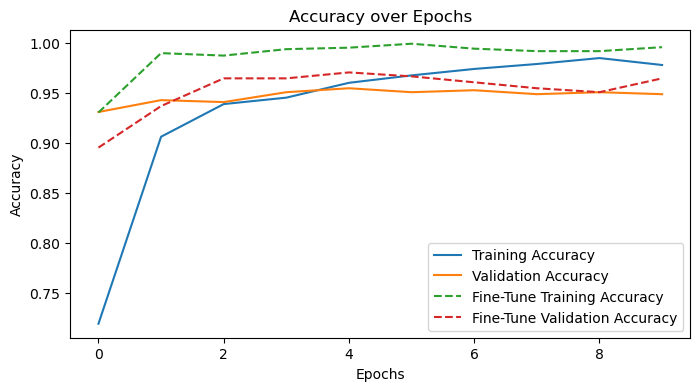

In [71]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tune Training Accuracy', linestyle='--')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tune Validation Accuracy', linestyle='--')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

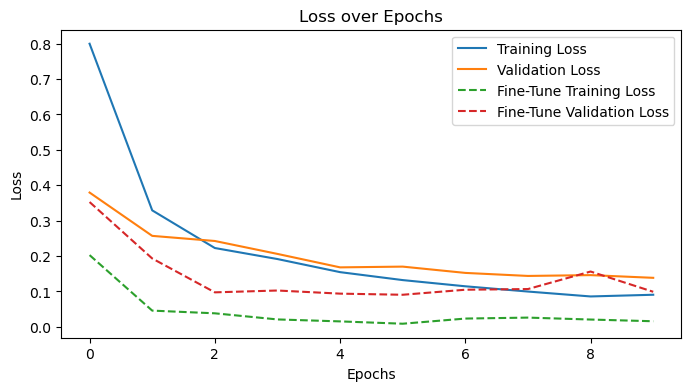

In [73]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(fine_tune_history.history['loss'], label='Fine-Tune Training Loss', linestyle='--')
plt.plot(fine_tune_history.history['val_loss'], label='Fine-Tune Validation Loss', linestyle='--')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,724,945 (25.65 MB)

 Trainable params: 2,230,277 (8.51 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,460,556 (17.02 MB)